# 금주 내용

In [ ]:
- 텐서플로우 2.x, 3가지 스타일, 케라스 중식으로 구성된다
- 전이학습, 3~4가지 스타일
- CNN, RNN, + 알파 <-> CNN, (RNN or 생성모델:GAN or 강화학습:~DQN)

# 개요

- 종합 1위 (아카이브 논문수, 깃허브 활동량, 온라인 구직 활동)
- 구글의 생태계에서 자유롭게 사용 가능
  - 코랩, 구글 클라우드, 빅쿼리, AutoML등등 이 모든 섹션에서 효과적으로 작업이 가능하다 (지원)
  - TPU는 2.0에서 정식 호환되었다
  - python, c++, javascipt(or typescript). java, go, swift(아이폰) 지원
  - 모바일기기, 웹, 임베디드 모든 기기 지원
  - 오픈소스, 2100+ 이상 코드기여자

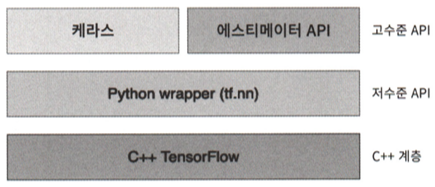

In [1]:
from IPython.display import Image
Image('/content/drive/MyDrive/edu.kenshi/2021/품질재단/DL/new_res/텐서플로우_주요아키텍쳐.png')

# 텐서플로 2.x 구조

- C++ 계층 : 딥러닝 연산(계산) 담당, gpu 연산
- 저수준 api : 파이썬으로 c++코드를 감싼다 (cython 활용)
  - 이 api로 딥러니 코드 작성 (저수준 api로 작성하는 딥러닝)
- 고수준 API :
  - keras API 로 통일
    - 사용자 친화적, 모듈로 구성, 확장성이 높다
  - Estimator API
    - 머신러닝 지원
    - DNNClassifier, DNNRegressor,...
    - 훈련, 평가, 예측, ...

# 주요 변화점



1.x
  - 2017년 1월 1.0 알파
  - 1.x의 마지막 버전 1.15
  - 스타일 : **느긋한 실행 방식 (lazy execution)**
---
2.x
  - 2019년 3월 2.0 알파, 9월 2.0 정식 릴리스
  - 2021년 1월부터 텐서플로 2.0이 코랩 구성시 기본 버전
  - 스타일 : **조급한 실행 방식 (eager execution)**
    - 이런 방식이 아쉬운점은 최적화 기법을 실시간 적요하기가 어렵다
    - 이를 극복하기 위해서 **@tf.function** : 오토그래프(AutoGraph)
    - 최적화 -> 미분 => 자동미분을 지원하기 위해서 그래디언트 테이프라는 기능 제공한다
  
  - **1.x를 지원하는 도구 제공**
    - 혼란 방지
    - tf.compat.v1 표현 제공
    - tf_upgrade_v2 (업그레이드 스크립트) 제공 코드의 마이그레이션 지원(자동변환) -> 이부분은 수동으로 수정 

  - **Session, placeholder는 더이상 사용하지 않는다**

  - tf.keras
    - 2.x 버전은 keras로 고수준 API가 통합되었다
    - 2.x 버전의 개발은 **keras로 진행하는것을 권장**한다
      - from keras...... <- 올드버전(순수 케라스)
      - from tensorflow.keras <- 실제 참고할 소스/개발할 소스

# 개발 스타일 (별도 코랩 파일로 구성)

## 2.x 환경에서 1.x를 구현(동)하기

## 텐서플로 저수준 api를 이용하여 구현하기

## 텐서플로 고수준 api를 이용하여 구현하기 (keras)

# TPU 지원

- 구글의 머신러닝 딥러닝을 위해 설계된 하드웨어
- 구글의 제품들에서 사용가능(클라우드, 코랩)
- GPU 보다는 저전력으로 설계되어 잇다 -> 경제적/친환경적
- **32비트(float32)로 진행되는 연산을 16비트(bfloat16)으로 낮춰서 연산**한다

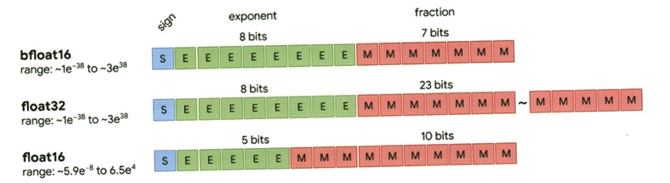

In [2]:
Image('/content/drive/MyDrive/edu.kenshi/2021/품질재단/DL/new_res/tf2.0_TPU_bfloat16구조.png')

# bfloat16는 float32와 비해 수치 정확도(exponent) 부분은 유지하면사
# float16만큰 줄여서 처리 -> 빠른 속도를 지원

# 분산 학습 전략(소개)